In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
prod = pd.read_excel('Volve production data.xlsx', sheet_name="Daily Production Data")
prod['DATEPRD'] = pd.to_datetime(prod['DATEPRD'], format='%d-%b-%Y')
well_name = prod['NPD_WELL_BORE_CODE'].unique()
wells = {}
print(list(prod.columns))
print(well_name)
m = 0
for i in well_name:
    wells[m] = prod[prod['NPD_WELL_BORE_CODE']==i].reset_index()
    print(wells[m]['FLOW_KIND'].unique())
    
    #wells[m].drop([['NPD_FACILITY_CODE', 'NPD_FACILITY_NAME']],axis = 1,inplace = True)
    m += 1
print(wells[2].head())

['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE', 'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE']
[7405 7078 5599 5351 7289 5693 5769]
['production']
['production']
['production']
['production']
['production']
['injection']
['injection' 'production']
   index    DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0   1911 2008-02-12  NO 15/9-F-12 H                5599          15/9-F-12   
1   1912 2008-02-13  NO 15/9-F-12 H                5599          15/9-F-12   
2   1913 2008-02-14  NO 15/9-F-12 H                5599          15/9-F-12   
3   1914 2008-02-15  NO 15/9-F-12 H                5599          15/9-F-12   
4   1915 2008-02-16  NO 15/9

In [3]:
for well in wells:
    wells[well] = wells[well][wells[well]['ON_STREAM_HRS']>20]
    wells[well].reset_index(inplace= True)

In [4]:
wells[2]

,level_0,index,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,1,1912,2008-02-13,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,120.888576,53.374330,89.620148,1869.70,285246.16,7.13,NaN,production,OP
1,2,1913,2008-02-14,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,113.718175,72.737631,80.120465,3124.09,509954.88,1.16,NaN,production,OP
2,3,1914,2008-02-15,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,116.830642,69.995943,84.250990,2608.28,383426.67,0.97,NaN,production,OP
3,4,1915,2008-02-16,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,115.434474,71.518347,82.359026,3051.80,418474.00,4.89,NaN,production,OP
4,5,1916,2008-02-17,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,115.205876,73.641800,82.168501,2982.63,422763.00,1.85,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,3015,4926,2016-08-08,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,32.411694,65.401424,8.517839,119.63,19170.05,863.73,NaN,production,OP
2630,3016,4927,2016-08-09,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,32.787385,66.198632,8.982105,110.61,18060.66,817.25,NaN,production,OP
2631,3017,4928,2016-08-10,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,32.752006,67.101547,8.870006,118.12,19262.51,850.79,NaN,production,OP
2632,3018,4929,2016-08-11,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,...,%,32.819491,66.378396,8.909327,120.41,19069.01,854.05,NaN,production,OP


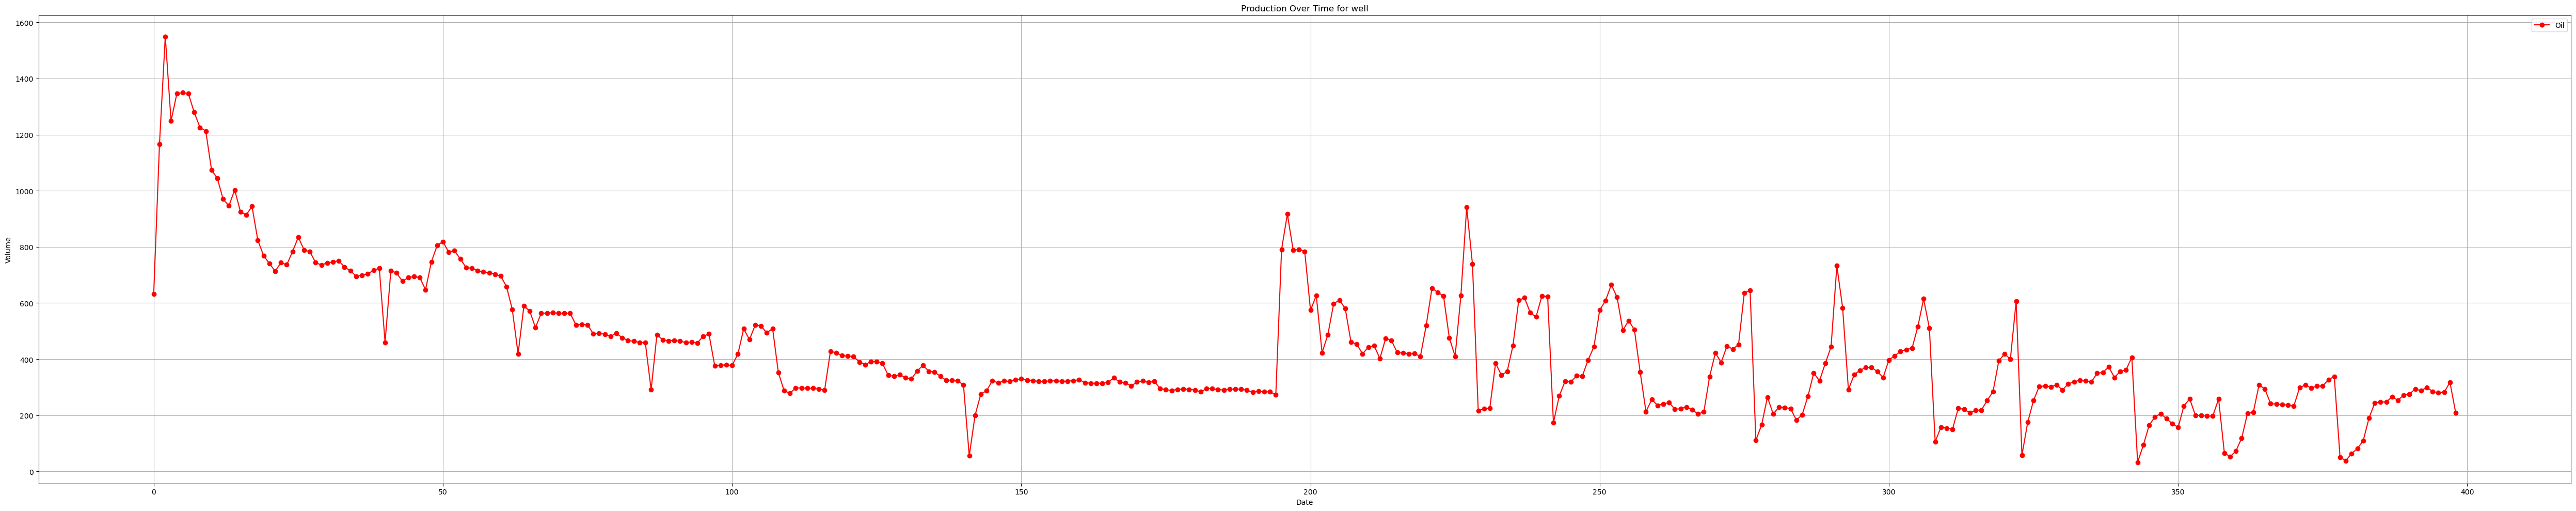

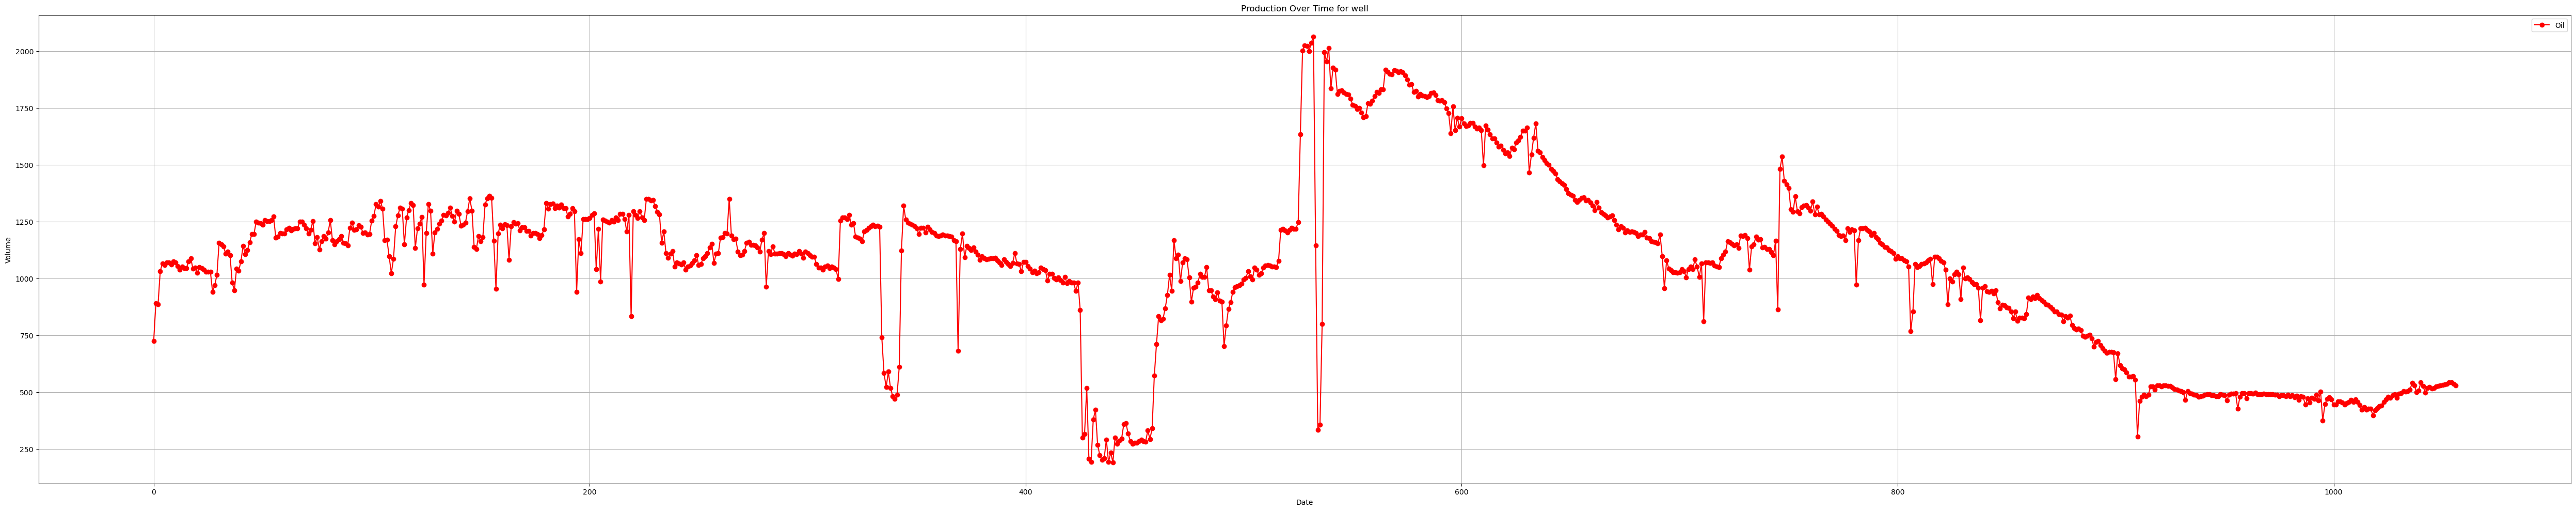

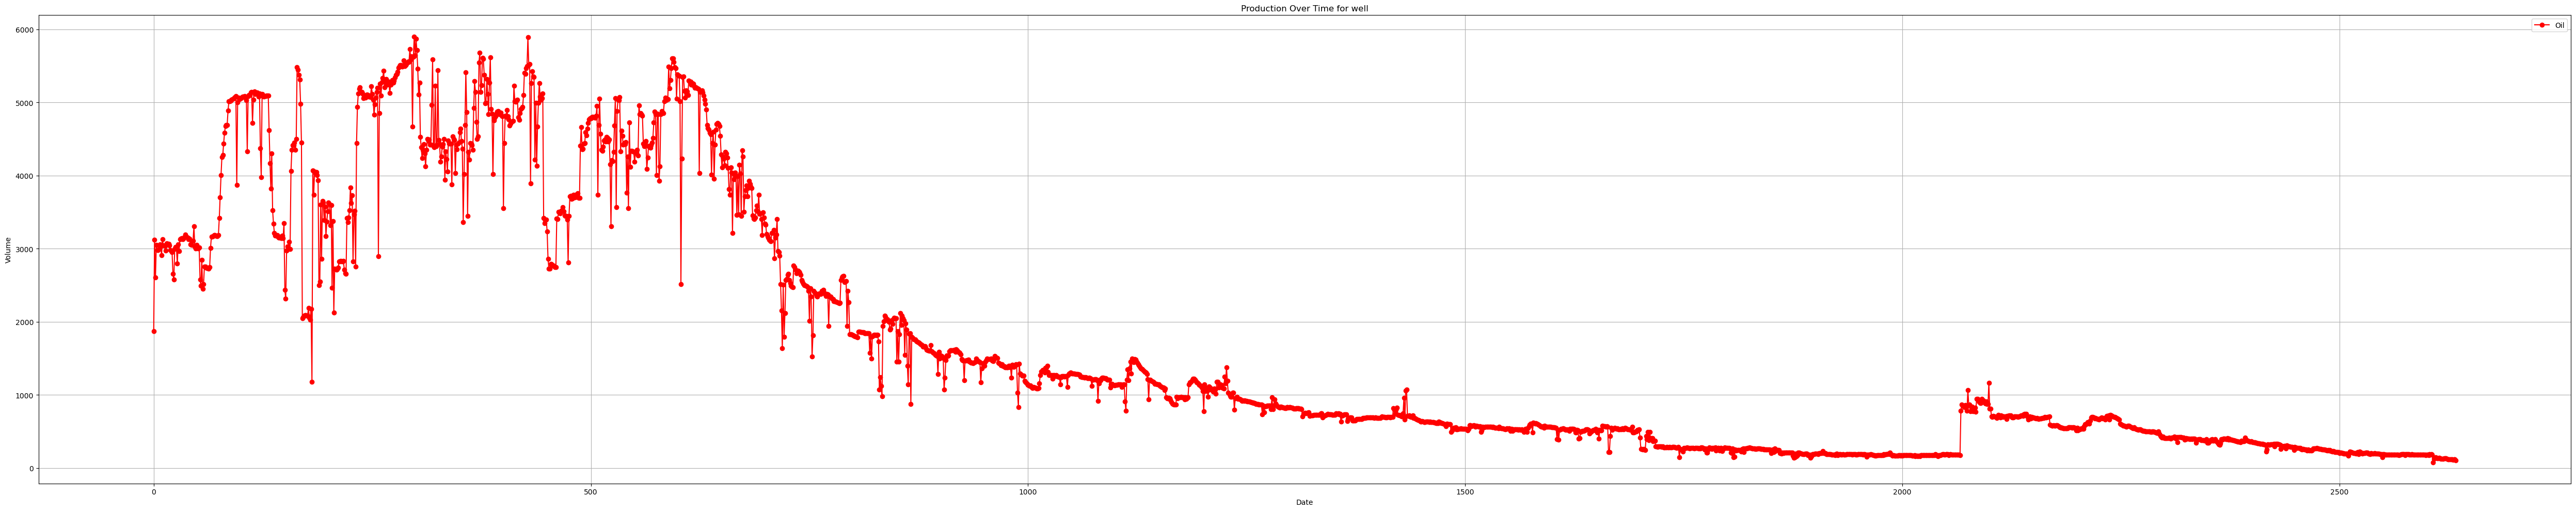

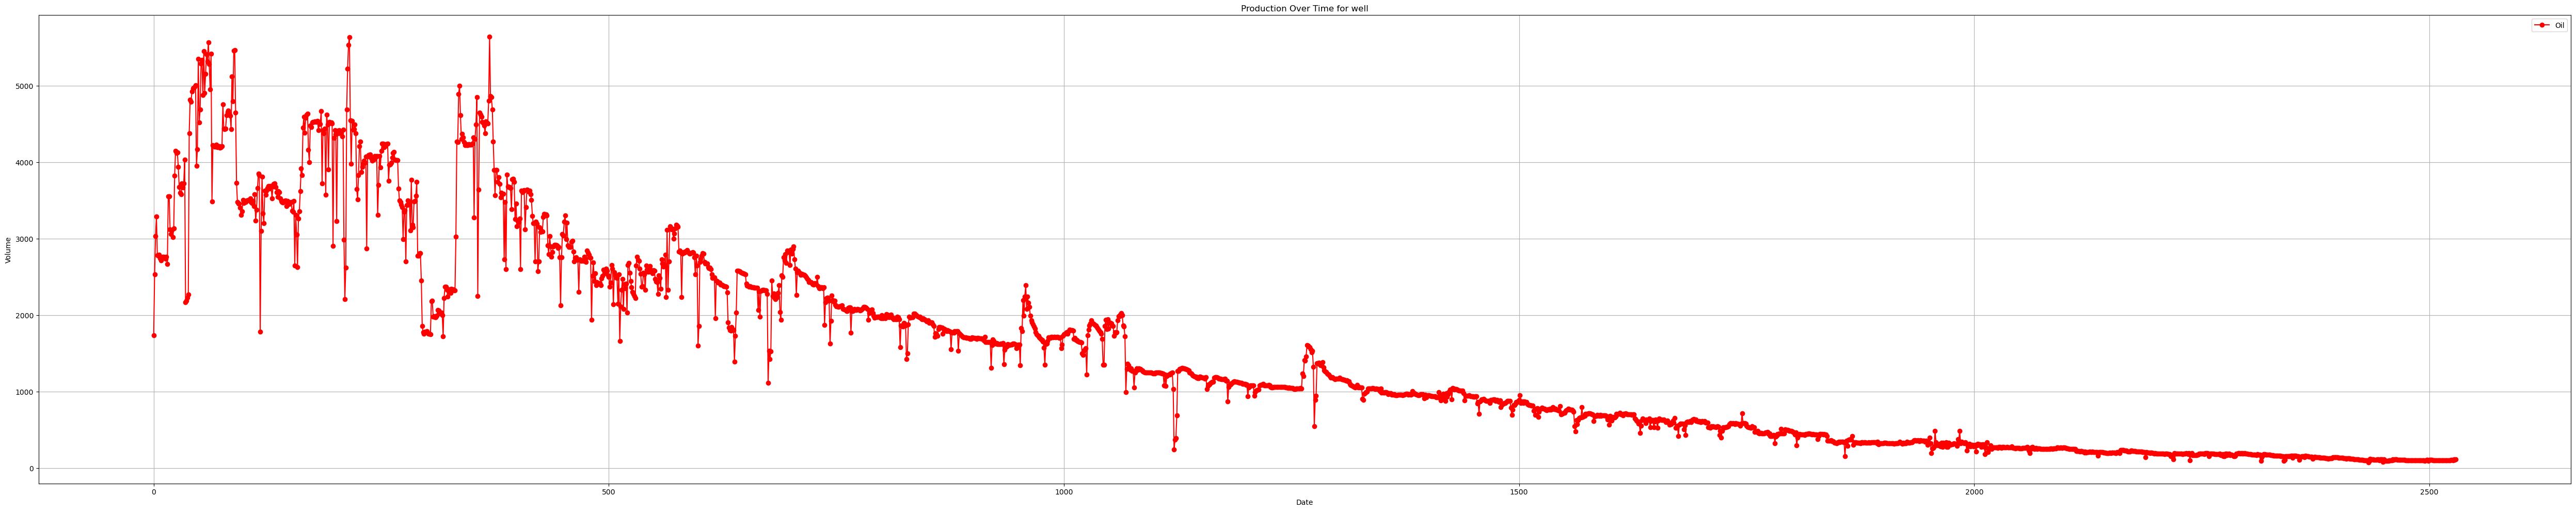

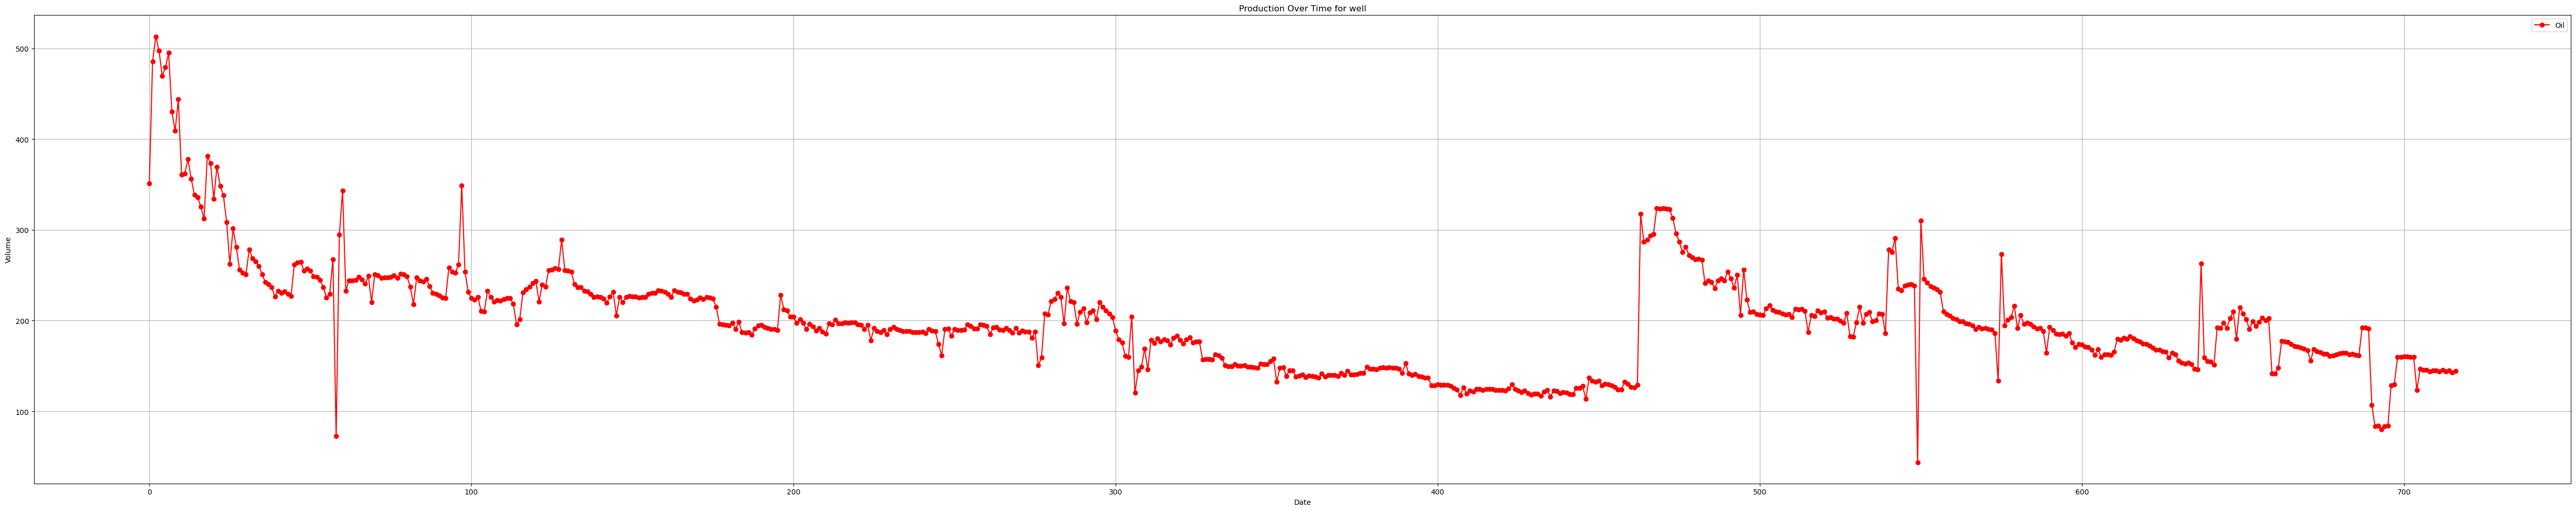

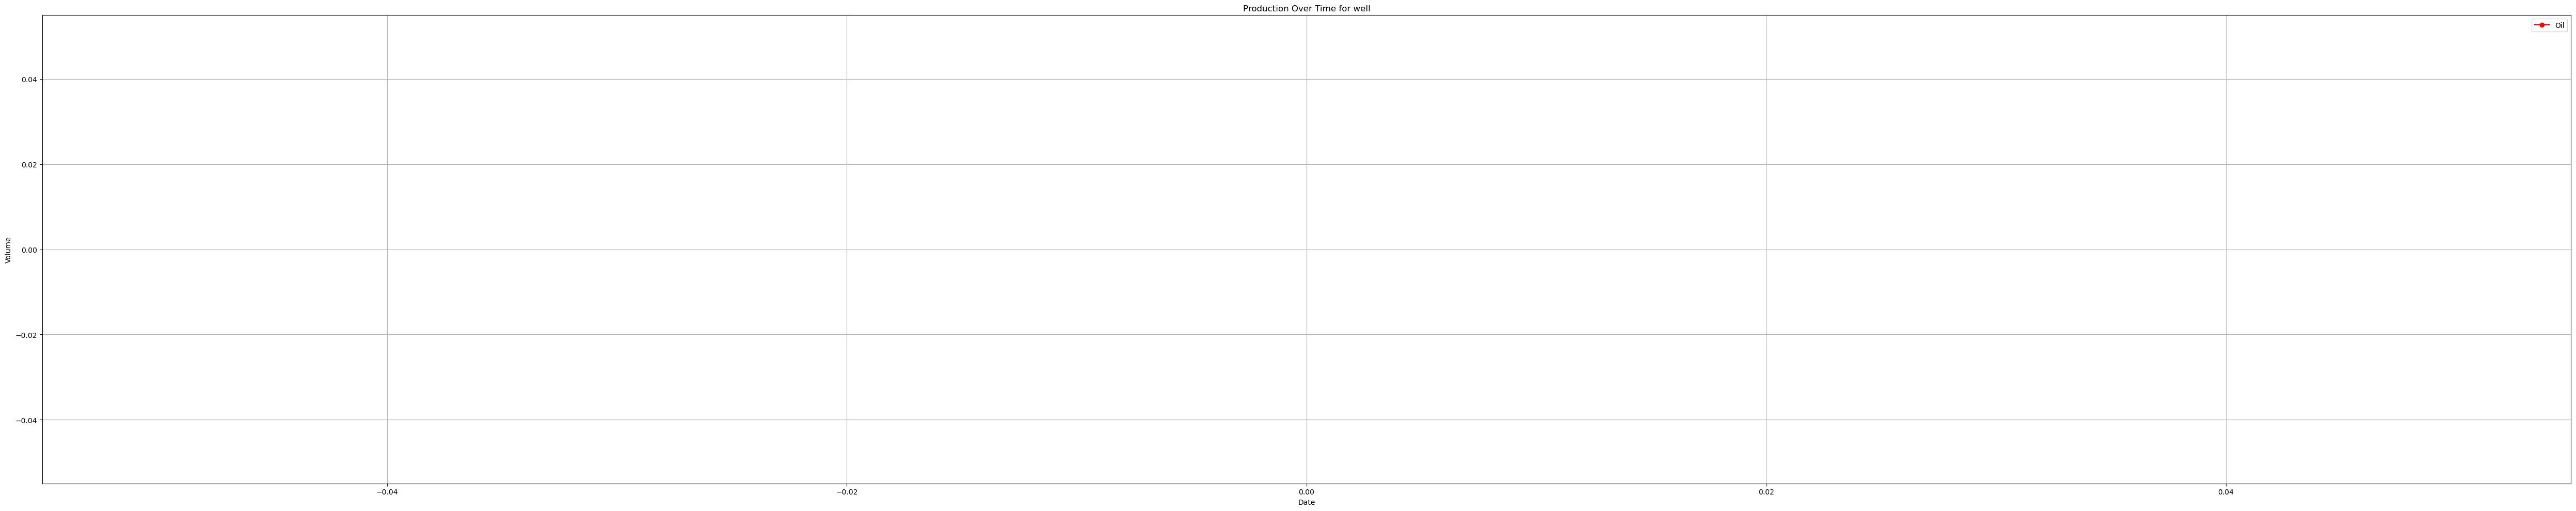

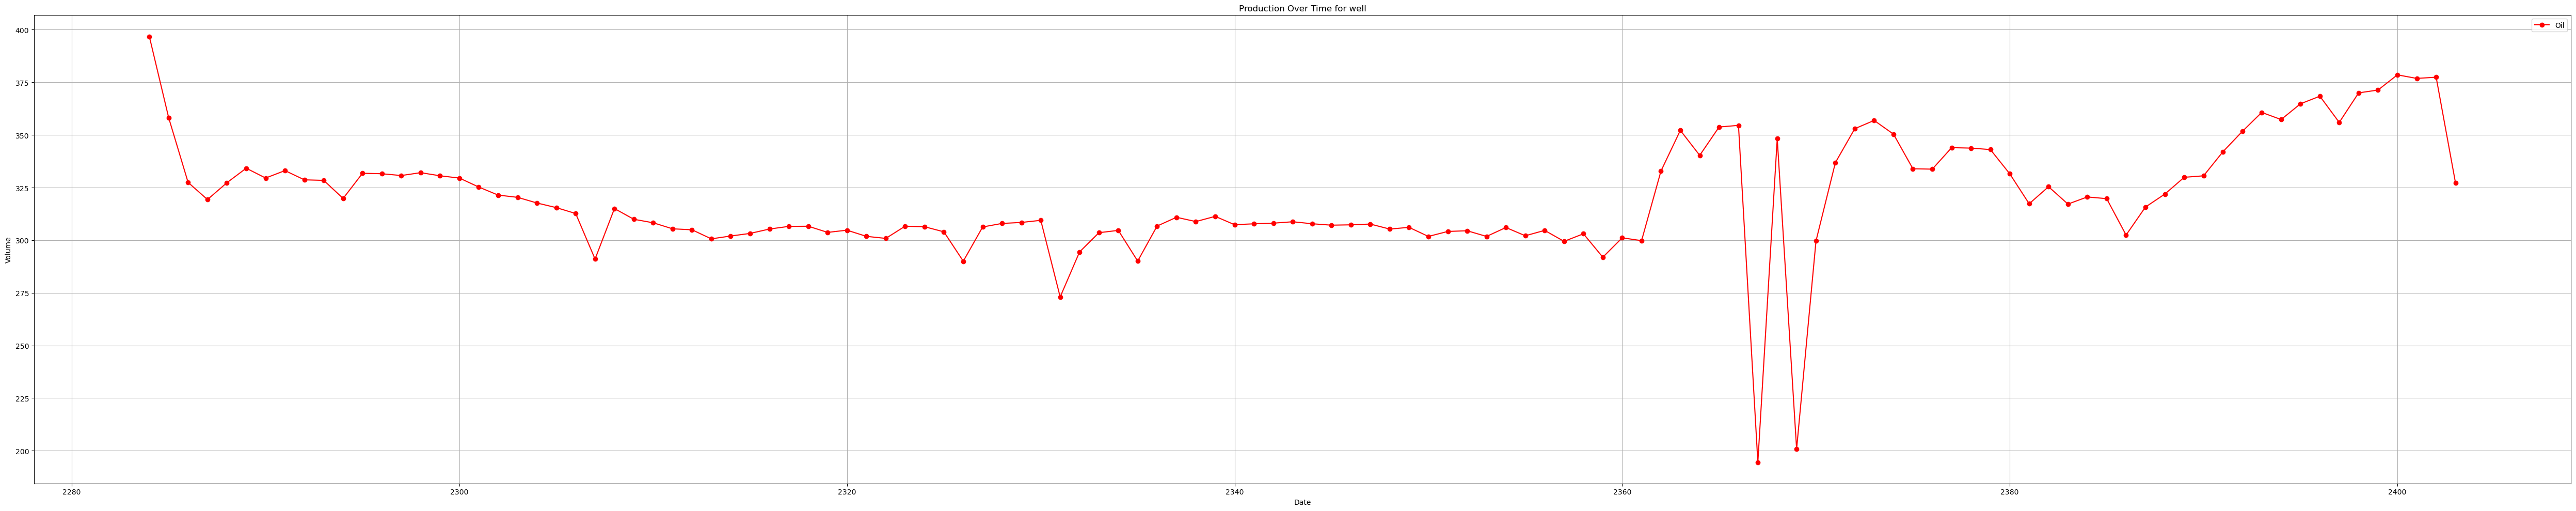

In [5]:
for well_code,well in wells.items():
    plt.figure(figsize=(50, 10))

    plt.plot(well['BORE_OIL_VOL'], label='Oil', marker='o', color ='r')
    #plt.plot(well['DATEPRD'], well['BORE_GAS_VOL'], label='Gas', marker='s')
    #plt.plot(well['DATEPRD'], well['BORE_WAT_VOL'], label='Water', marker='^')

    plt.title(f'Production Over Time for well')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #plt.savefig(f"Gas for {well_code}.jpg")

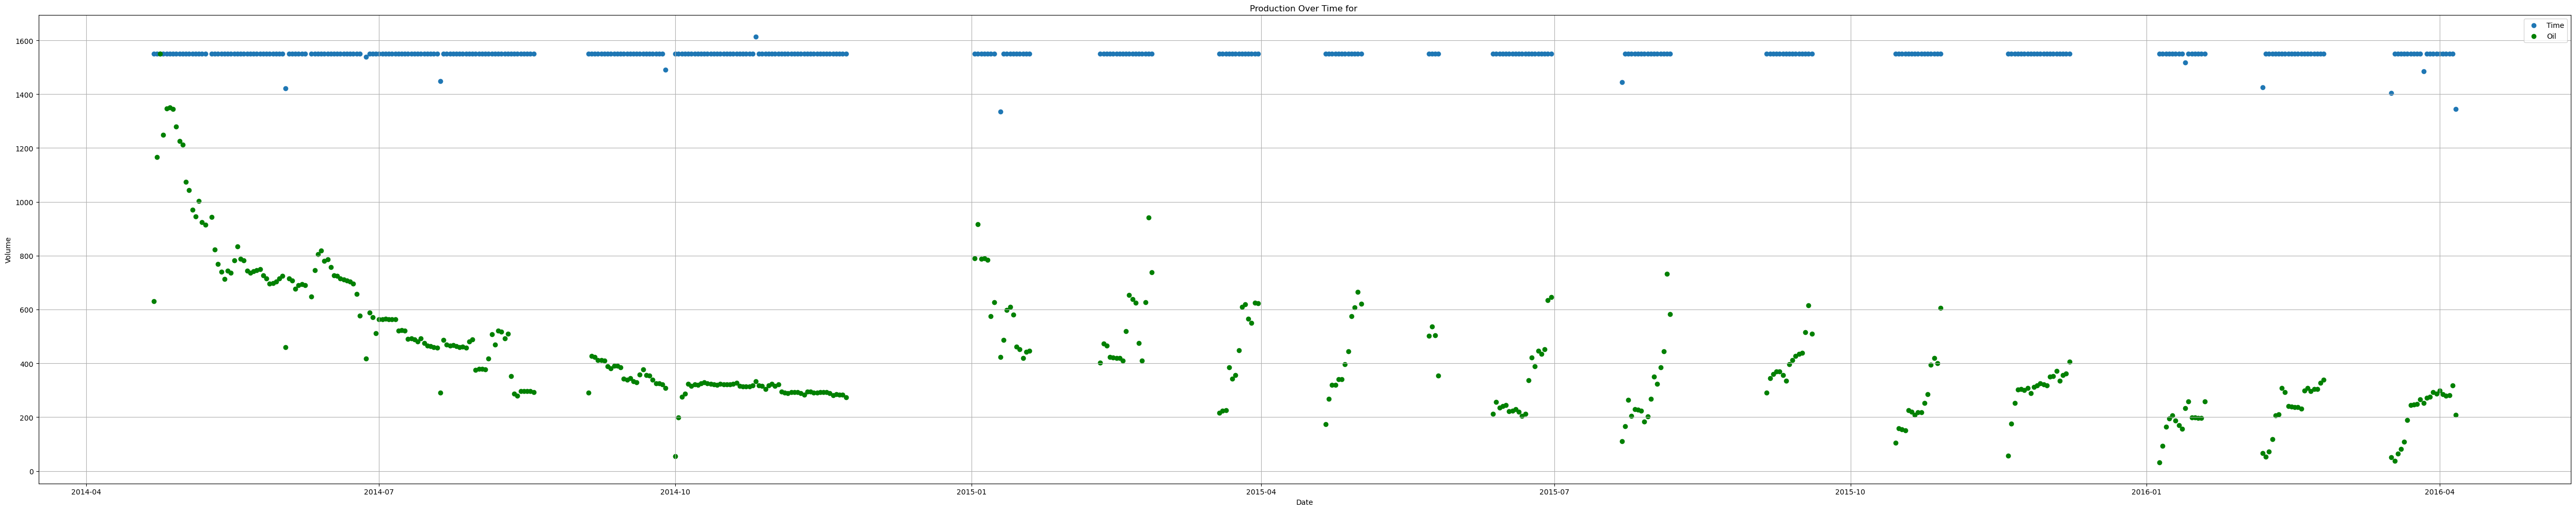

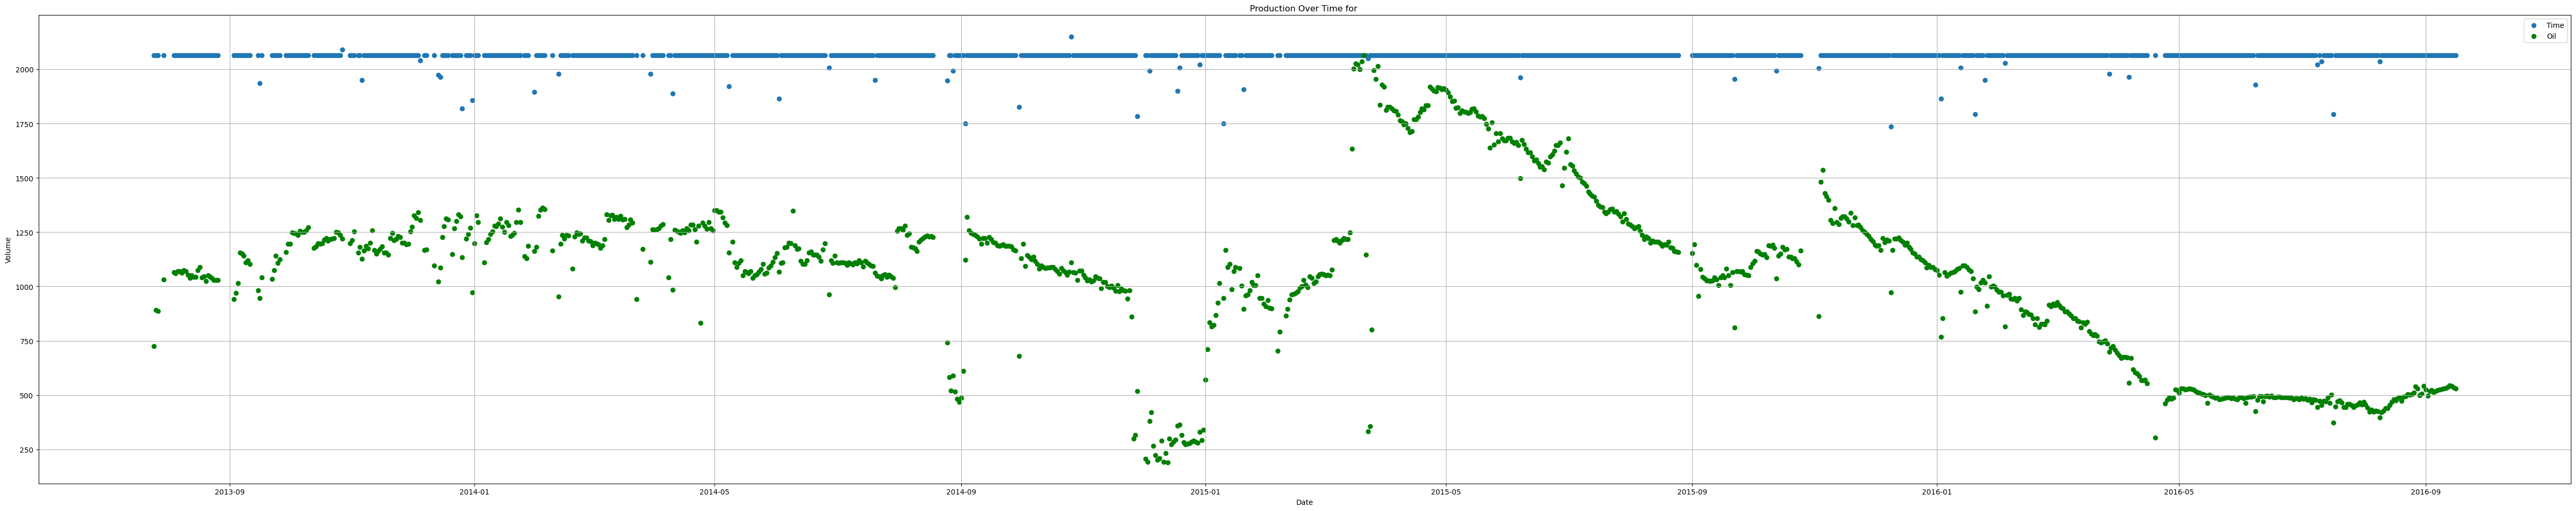

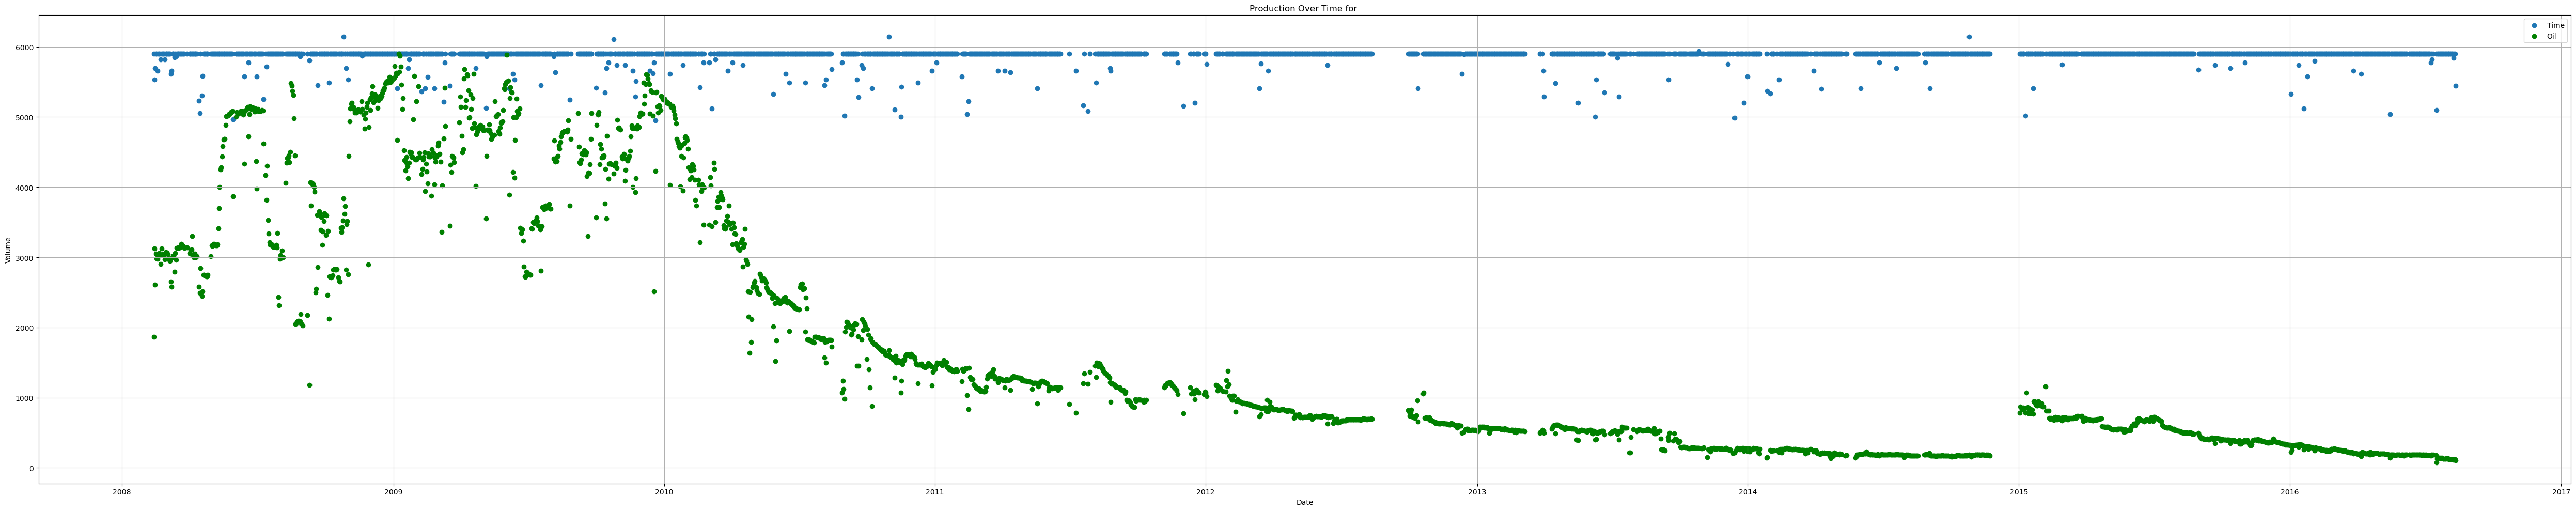

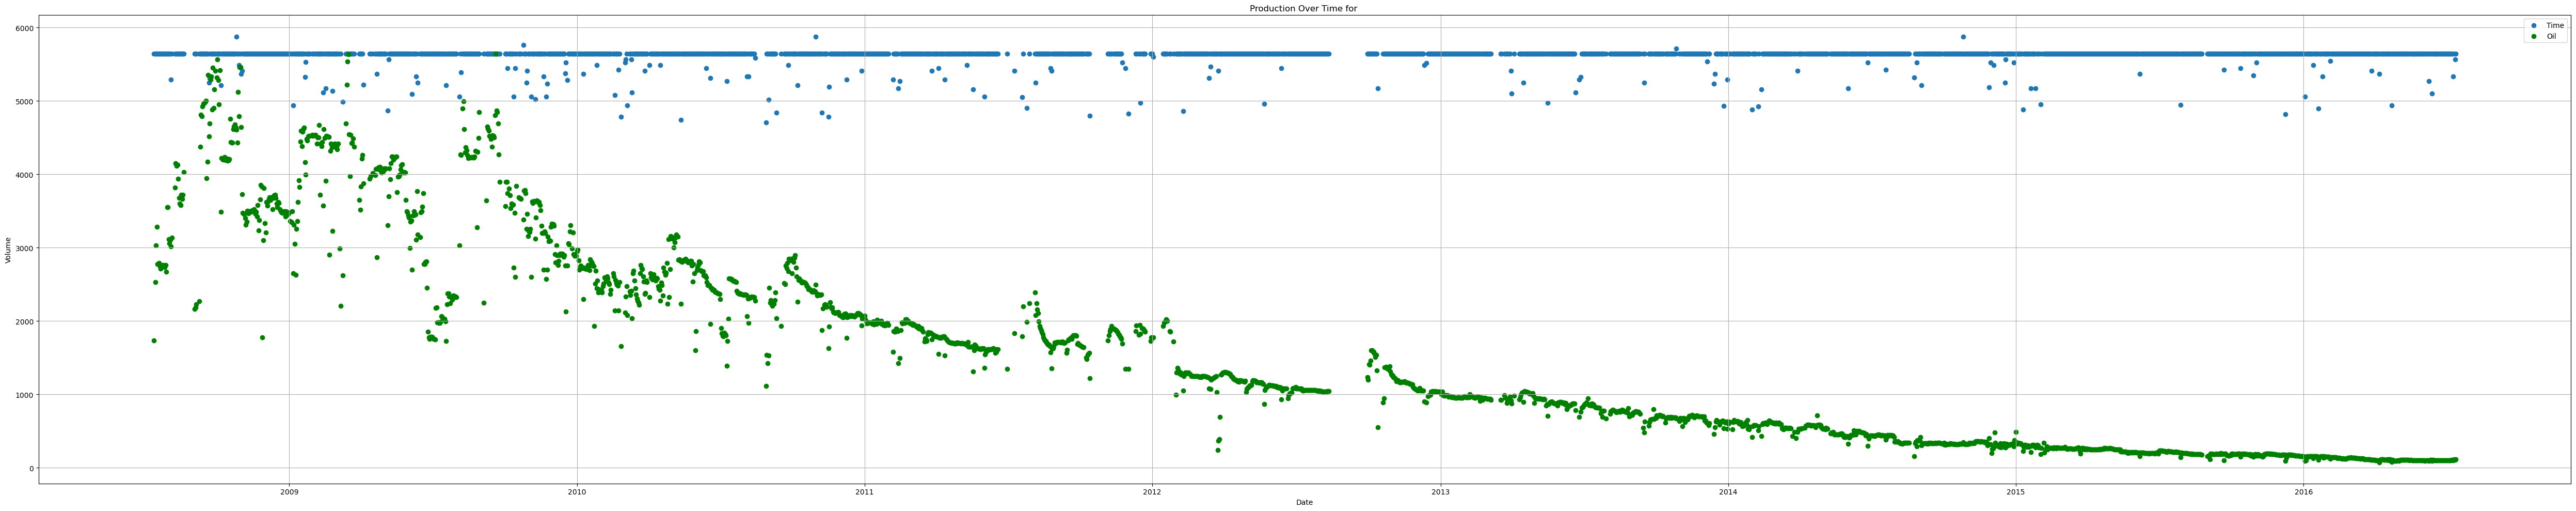

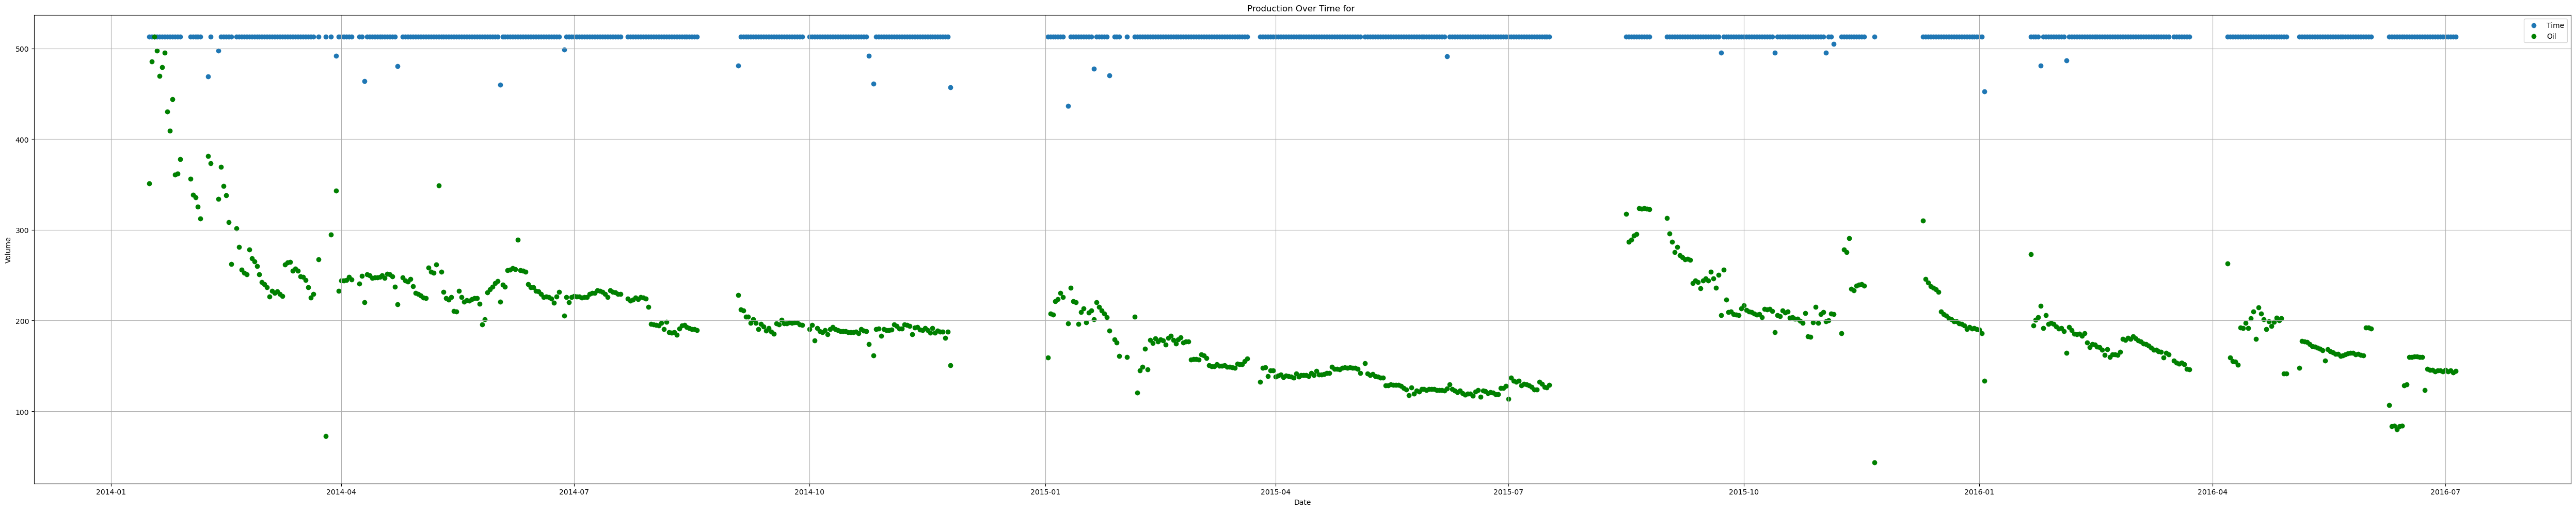

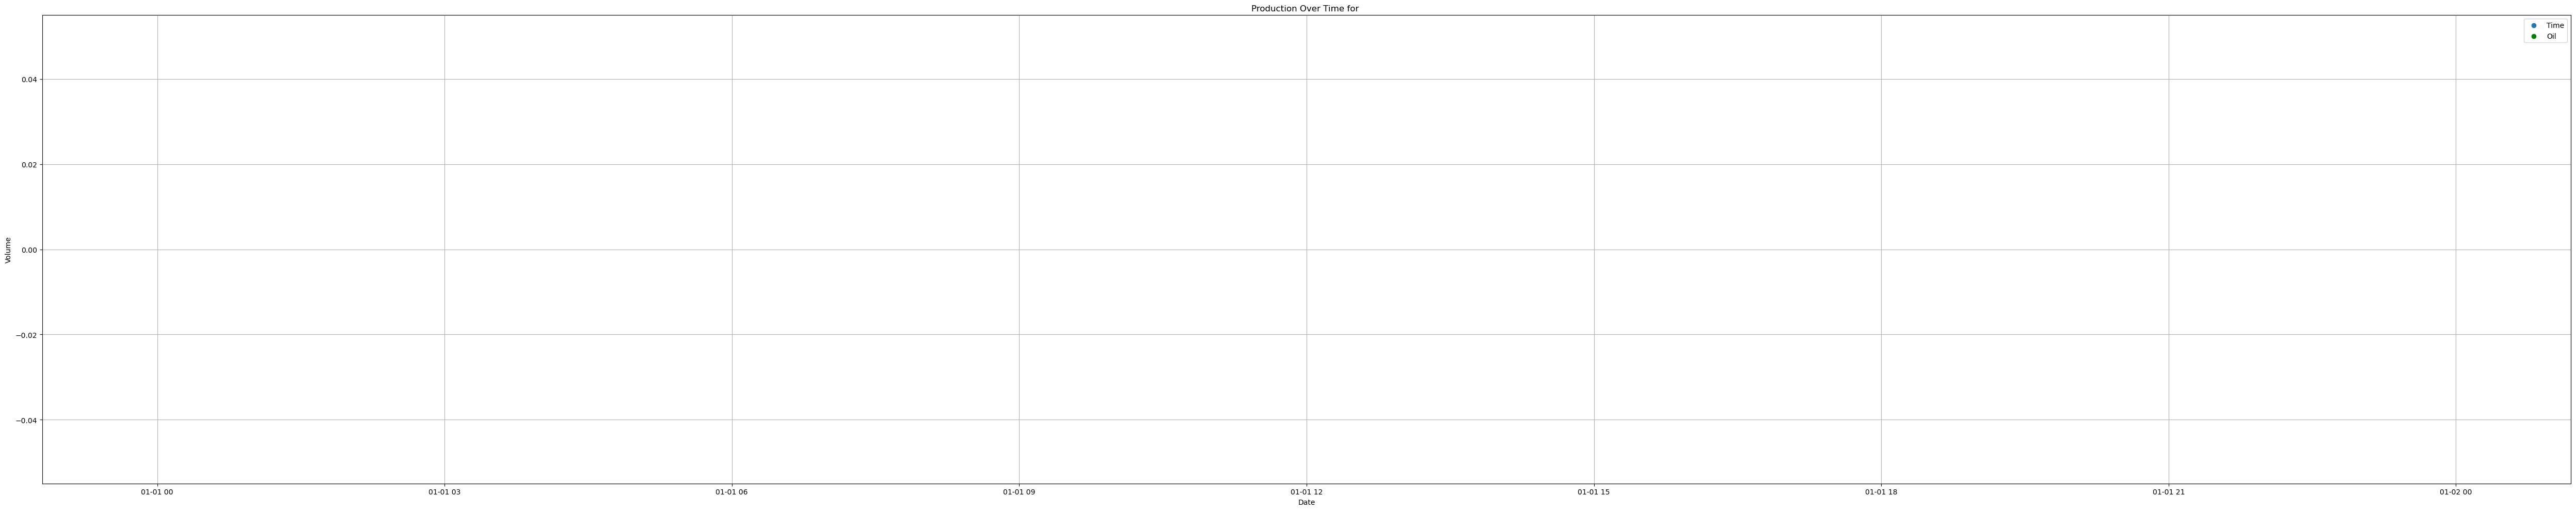

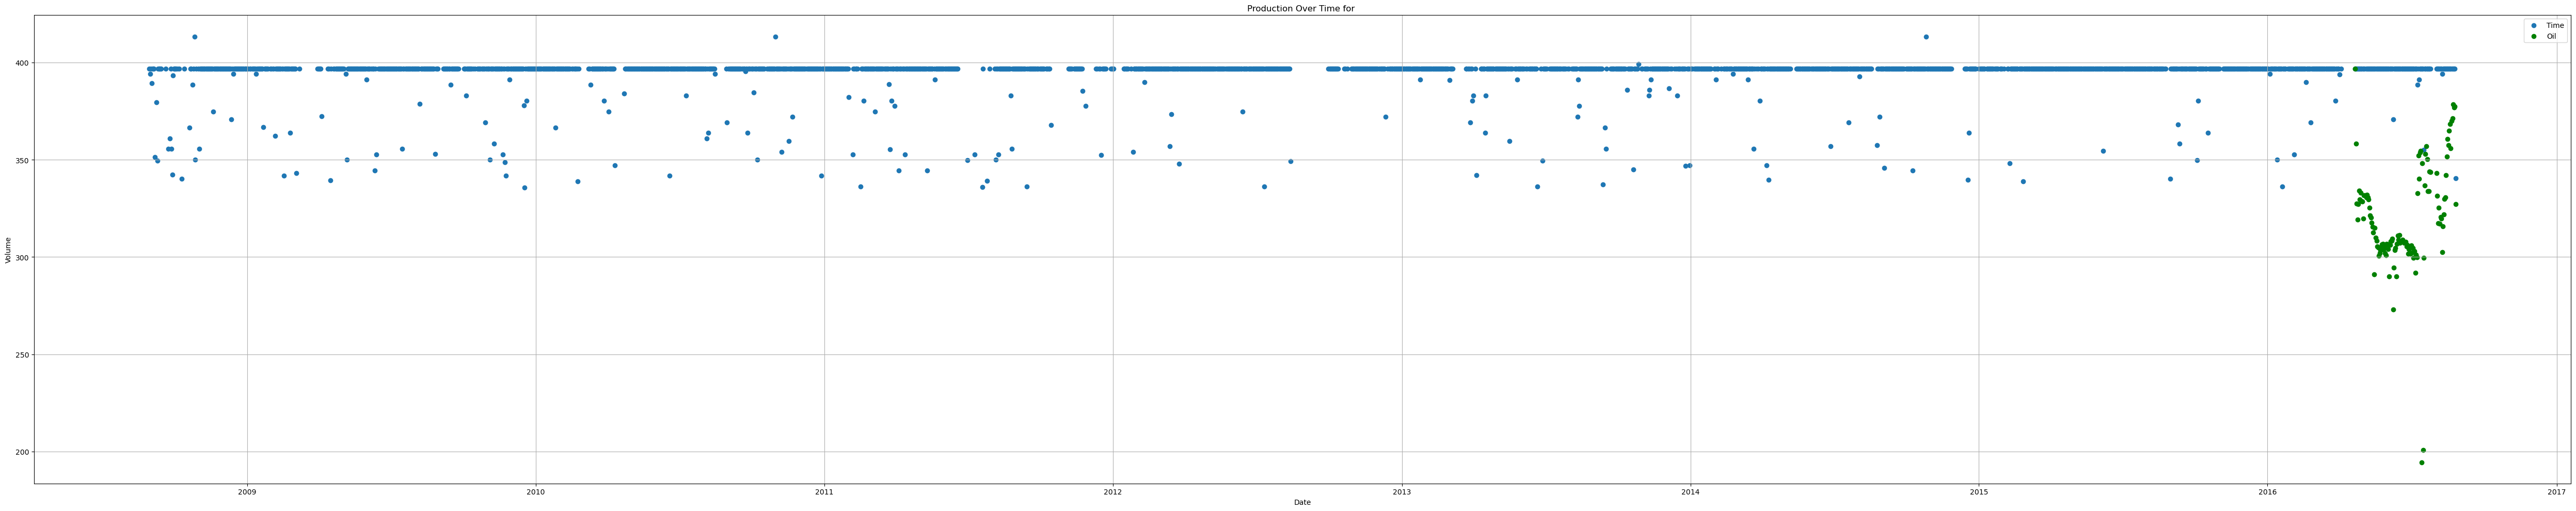

In [6]:
for well_code,well in wells.items():
    plt.figure(figsize=(50, 10))

    plt.scatter(well['DATEPRD'], well['ON_STREAM_HRS']*(well['BORE_OIL_VOL'].max())/24, label='Time', marker='o')
    plt.scatter(well['DATEPRD'], well['BORE_OIL_VOL'], label='Oil', marker='o',color = 'green')
    #plt.scatter(well['DATEPRD'], well['BORE_GAS_VOL'], label='Gas', marker='s',color = 'red')
    #plt.plot(well['DATEPRD'], well['BORE_WAT_VOL'], label='Water', marker='^')

    plt.title(f'Production Over Time for ')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #plt.savefig(f"Gas for {well_code}.jpg")

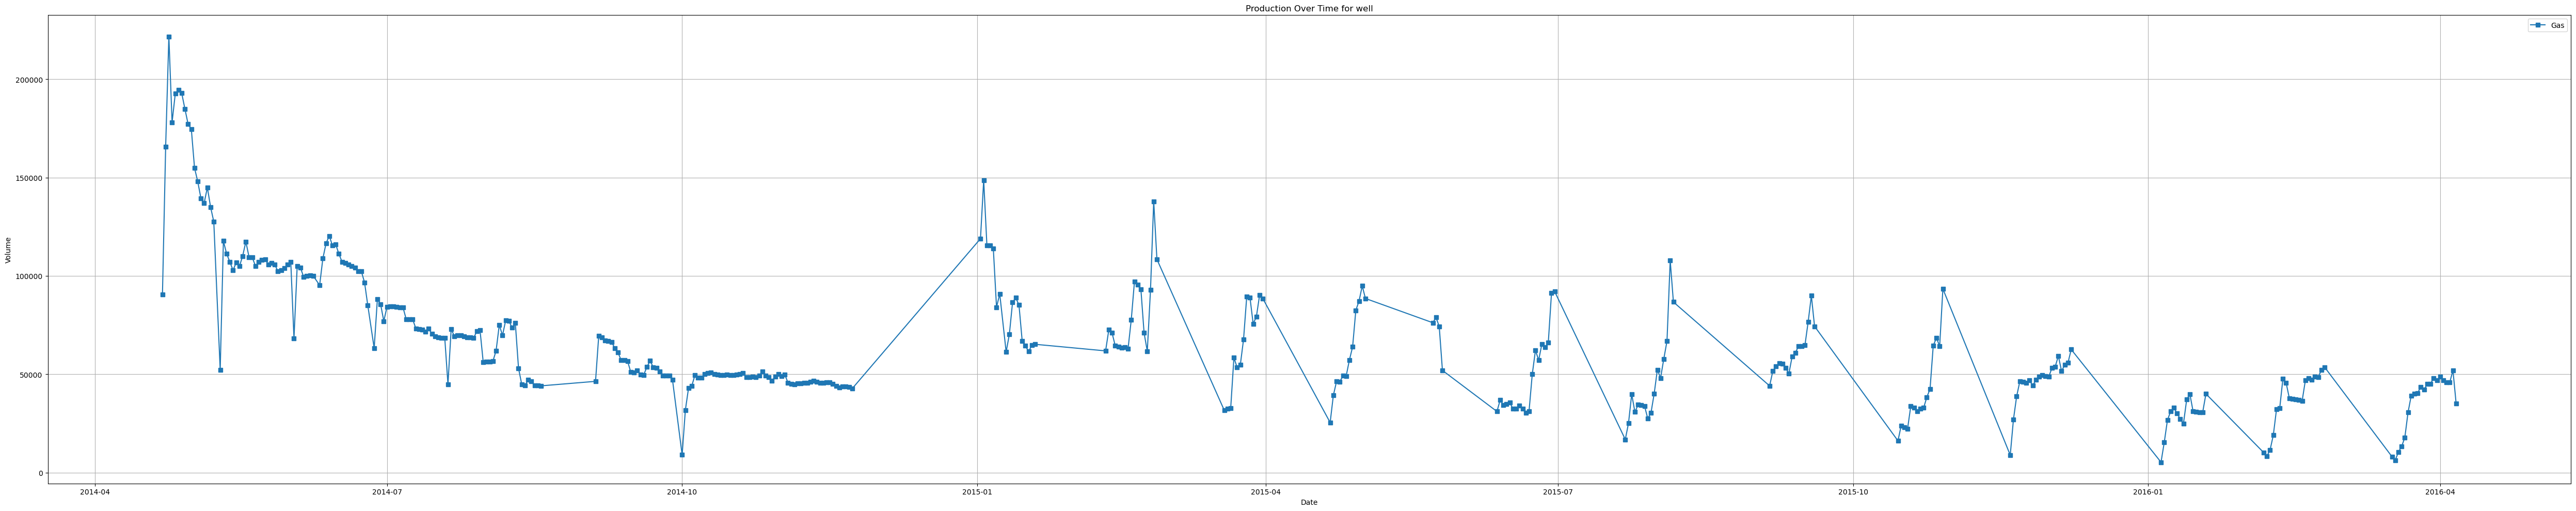

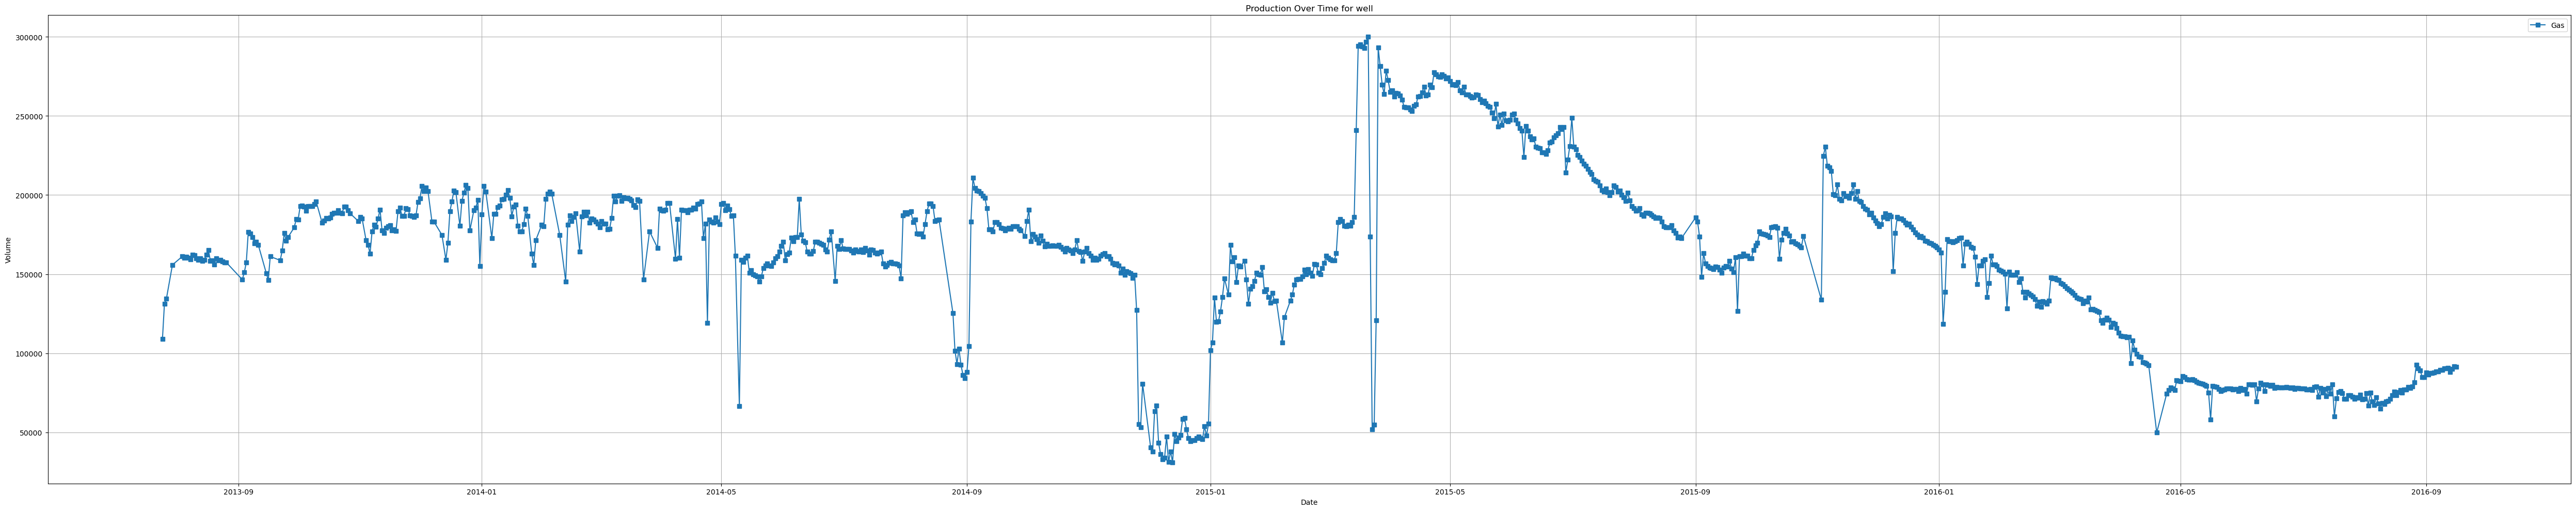

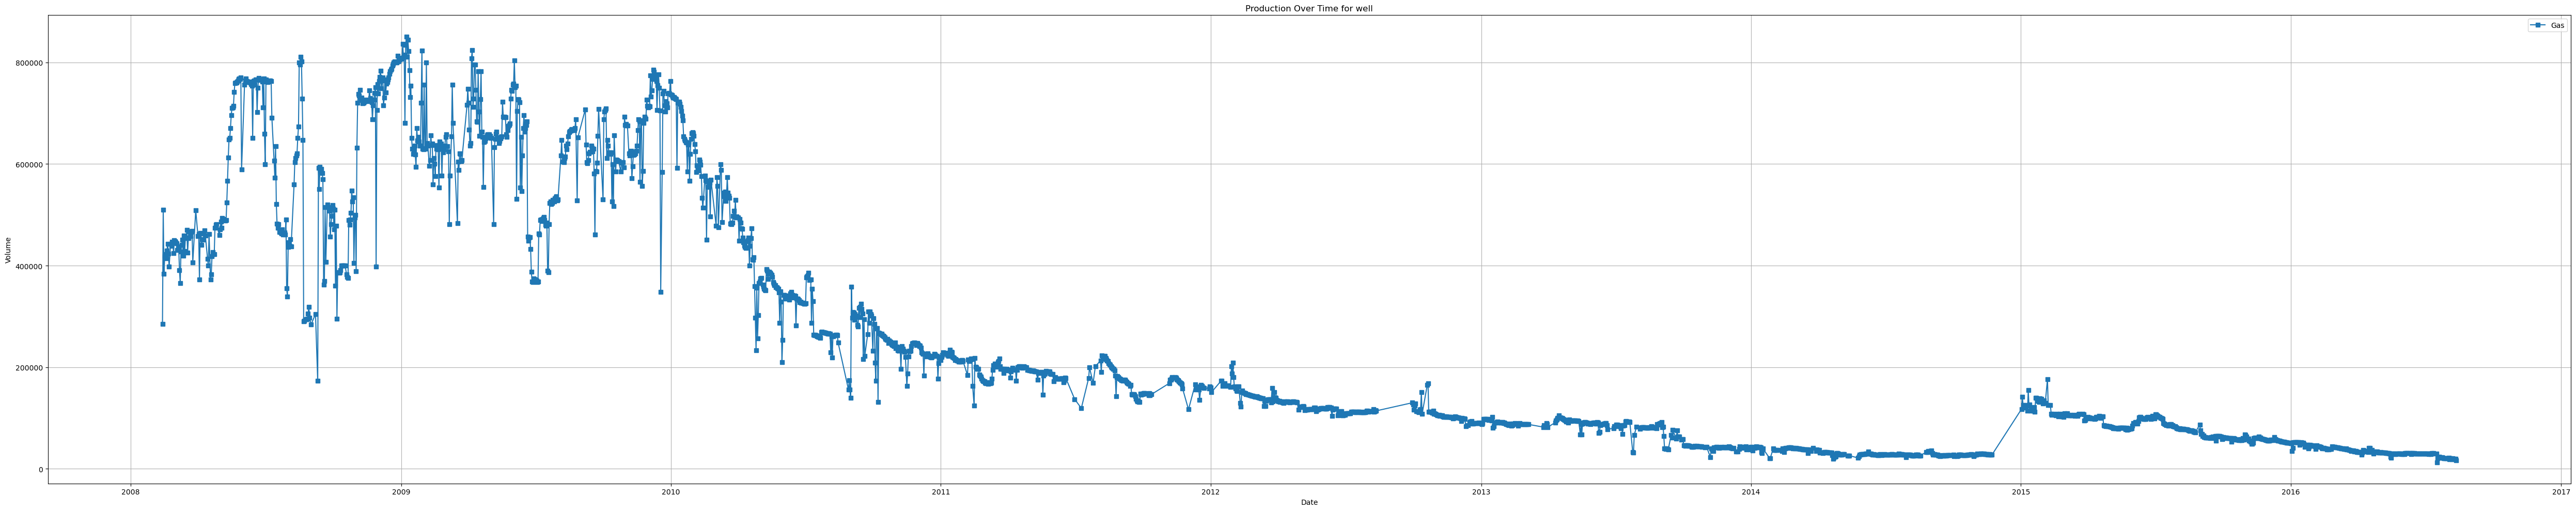

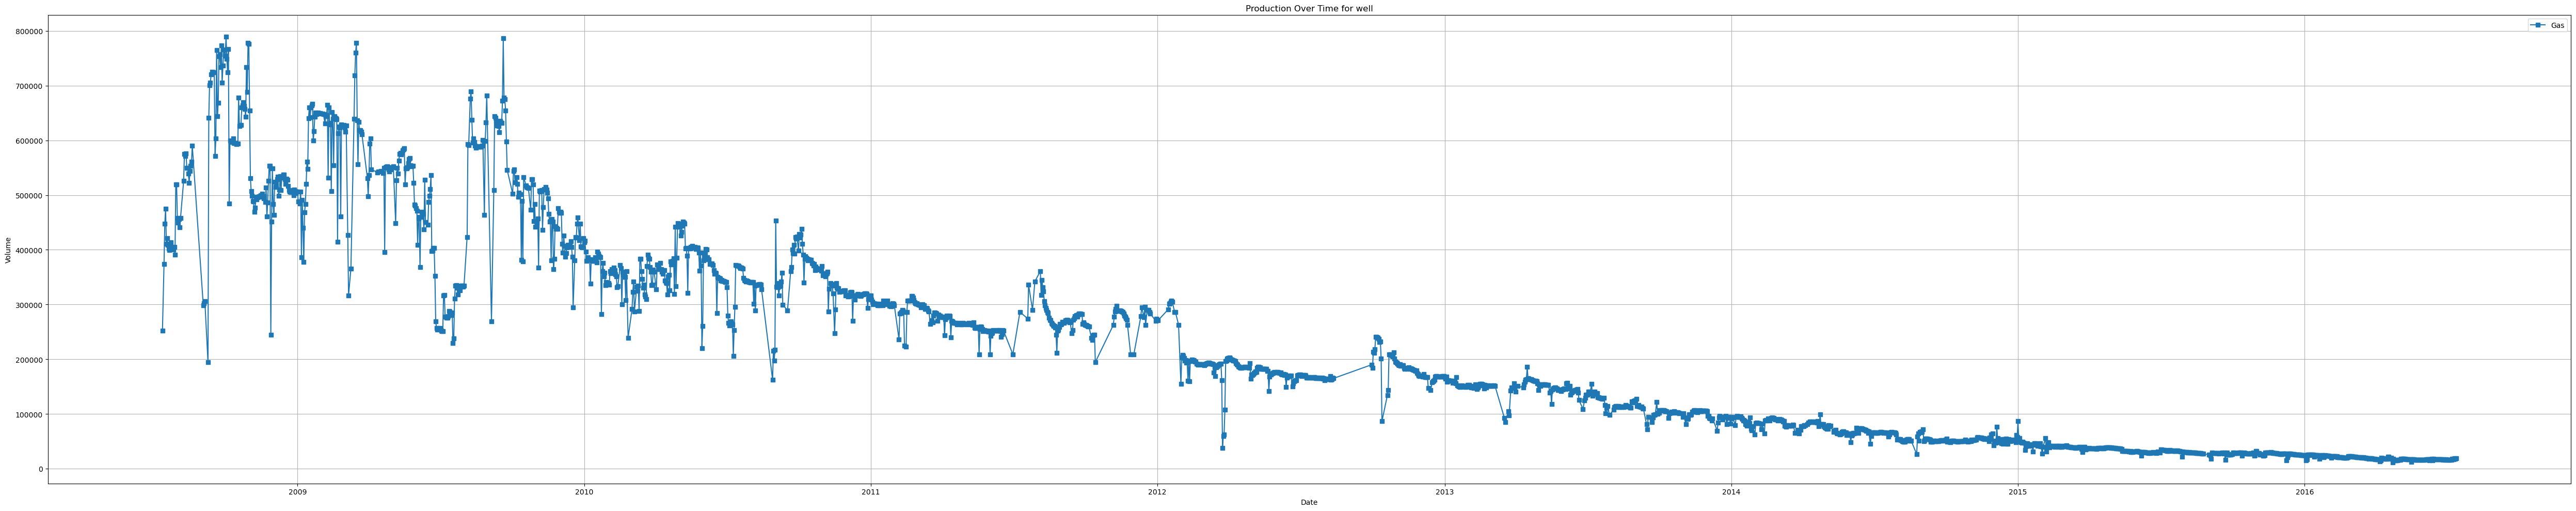

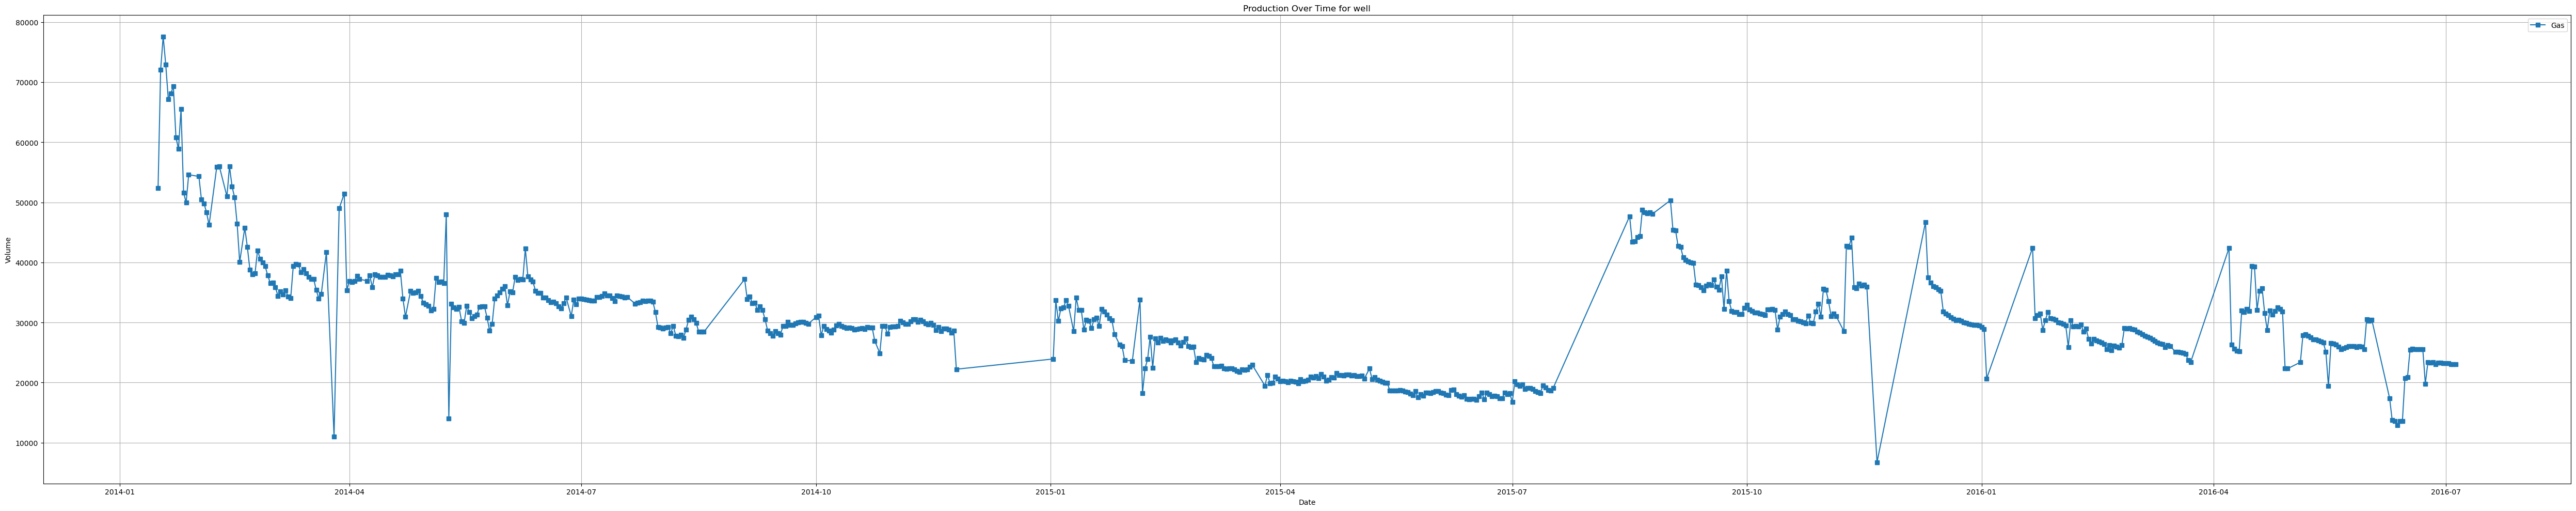

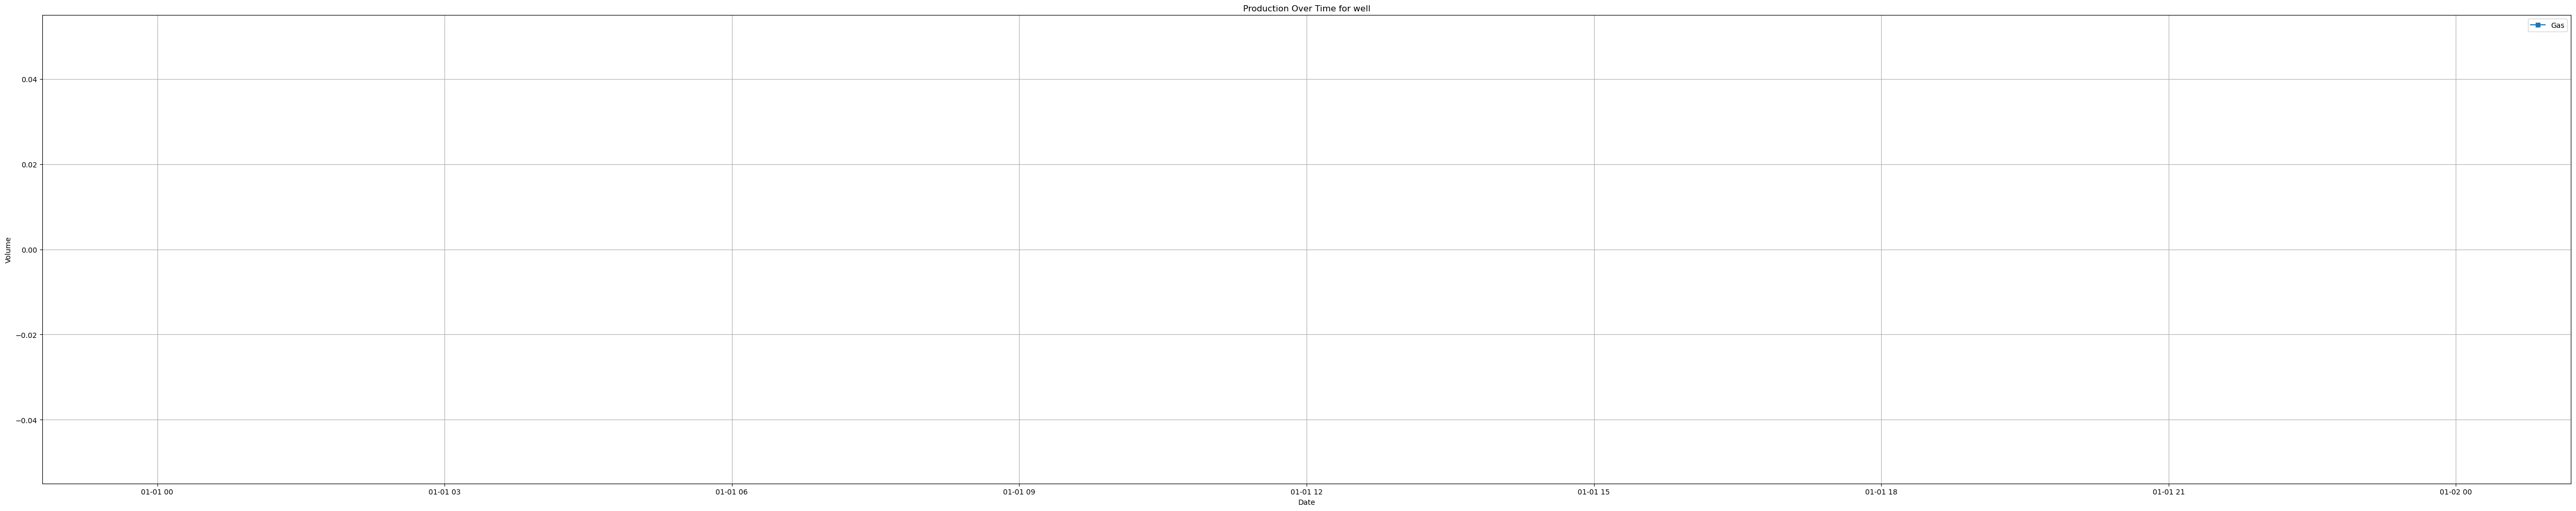

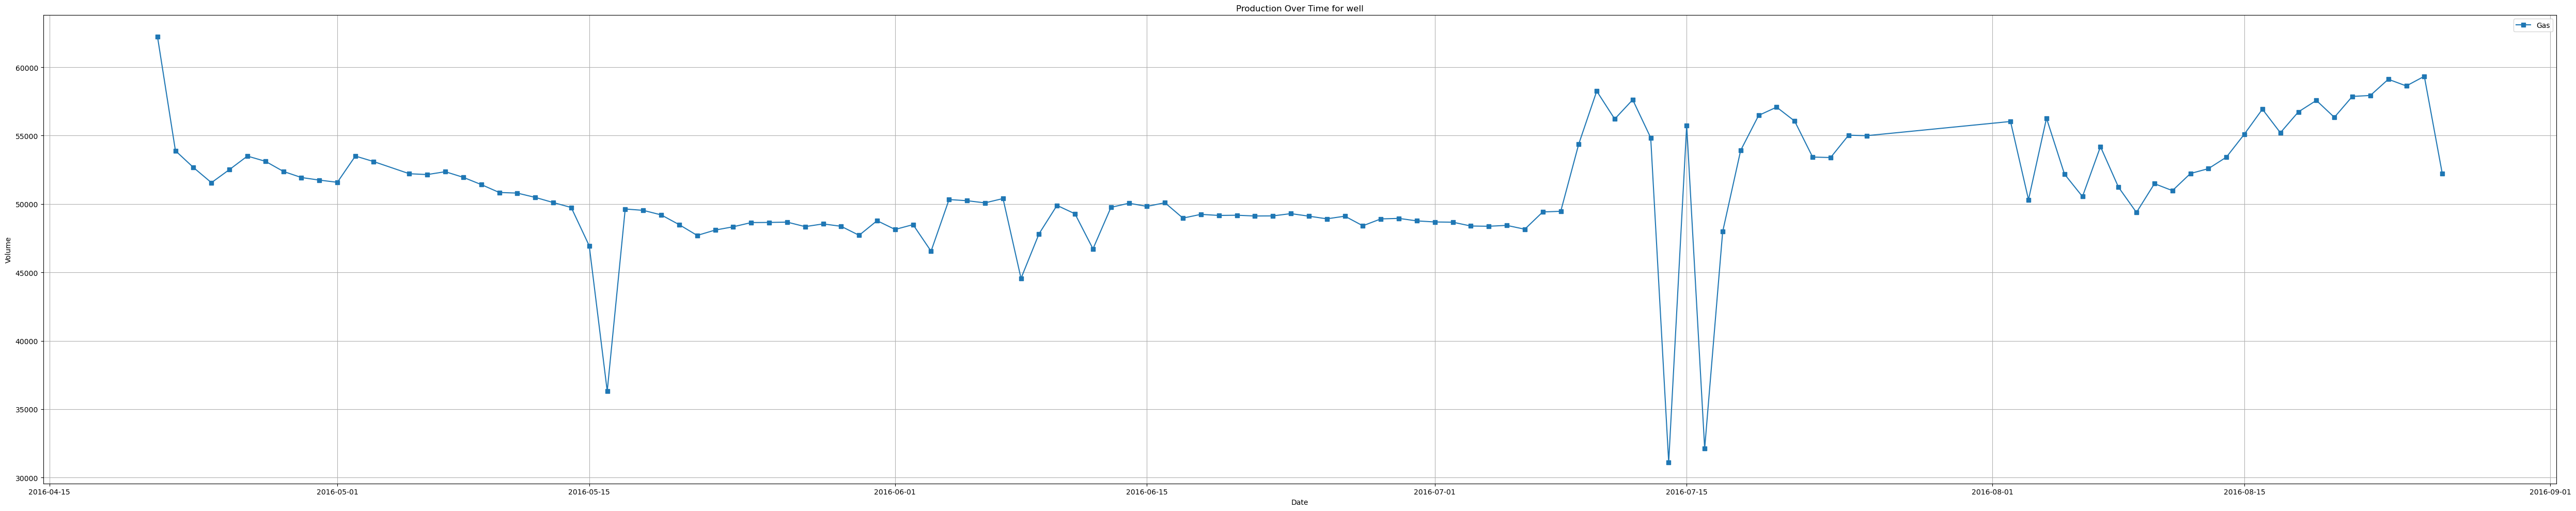

In [7]:
for well_code,well in wells.items():
    plt.figure(figsize=(50, 10))

    #plt.plot(well['BORE_OIL_VOL'], label='Oil', marker='o')
    plt.plot(well['DATEPRD'], well['BORE_GAS_VOL'], label='Gas', marker='s')
    #plt.plot(well['DATEPRD'], well['BORE_WAT_VOL'], label='Water', marker='^')

    plt.title(f'Production Over Time for well')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [133]:
print(wells[2].columns)
features = [ 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE' ]
target = [ 'BORE_OIL_VOL']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wells[2].loc[600:1500,features])
y = wells[2].loc[600:1500,target].values

Index(['level_0', 'index', 'DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE',
       'NPD_WELL_BORE_NAME', 'NPD_FIELD_CODE', 'NPD_FIELD_NAME',
       'NPD_FACILITY_CODE', 'NPD_FACILITY_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')


In [ ]:
def create_sequences(X, y, window_size=30):
    xs, ys = [], []
    for i in range(len(X) - window_size):
        xs.append(X[i:i+window_size])
        
        ys.append(y[i+window_size])
    return np.array(xs), np.array(ys)

window_size = 30
X_seq, y_seq = create_sequences(X_scaled, y, window_size)


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(window_size, len(features)), return_sequences=False),
   # Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

In [ ]:
y_pred = model.predict(X_test)

In [ ]:


plt.figure(figsize=(50,10))
plt.plot(y_test, label="Actual Production")
plt.plot(y_pred, label="Predicted Production")
plt.xlabel("Test Sample")
plt.ylabel("Daily Oil Rate")
plt.legend()
plt.title("Actual vs Predicted Oil Production")
plt.show()